In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk

from collections import Counter
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
dv = pd.read_csv("../rawdata/hololivecomments_cleaned.csv")

In [3]:
dv["created_utc"] =  pd.to_datetime(dv["created_utc"]).dt.tz_convert(None)

In [14]:
# Check dataframe

display(dv["submission_id"].count())
display(dv.info())
display(dv.head(1))

2285265

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285265 entries, 0 to 2285264
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   subreddit      object        
 1   id             object        
 2   submission_id  object        
 3   created_utc    datetime64[ns]
 4   author         object        
 5   score          float64       
 6   body           object        
 7   parent_id      object        
 8   permalink      object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 156.9+ MB


None

,subreddit,id,submission_id,created_utc,author,score,body,parent_id,permalink
0,Hololive,ff4gful,erj4fp,2020-01-20 23:30:06,raystrife96,4.0,uptodate rushia year outfit permanent pretty s...,t3_erj4fp,/r/Hololive/comments/erj4fp/i_have_some_questi...


In [7]:
# Function and Procedure

tokenSpace = tokenize.WhitespaceTokenizer()

def counter(text, columnText, quantity): # counter(dv[dv["score"] == 1], "body", 10)
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="deep")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

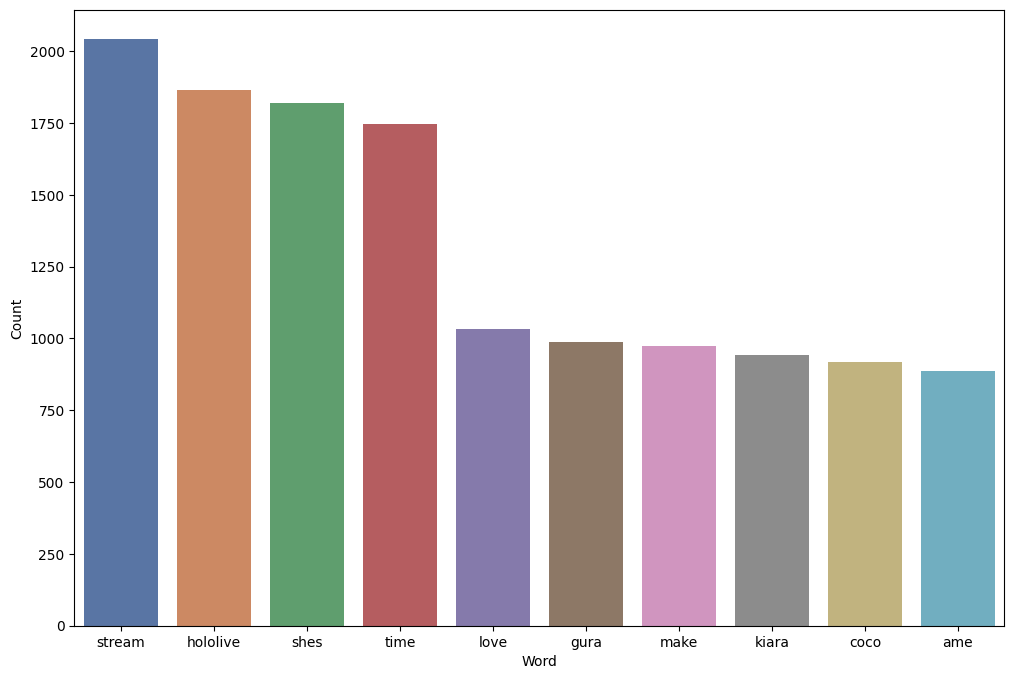

In [8]:
# Plot grafik yang menunjukkan 10 kata yang paling sering
# muncul untuk komentar yang skornya lebih dari 250

counter(dv[dv["score"] >= 250], "body", 10)

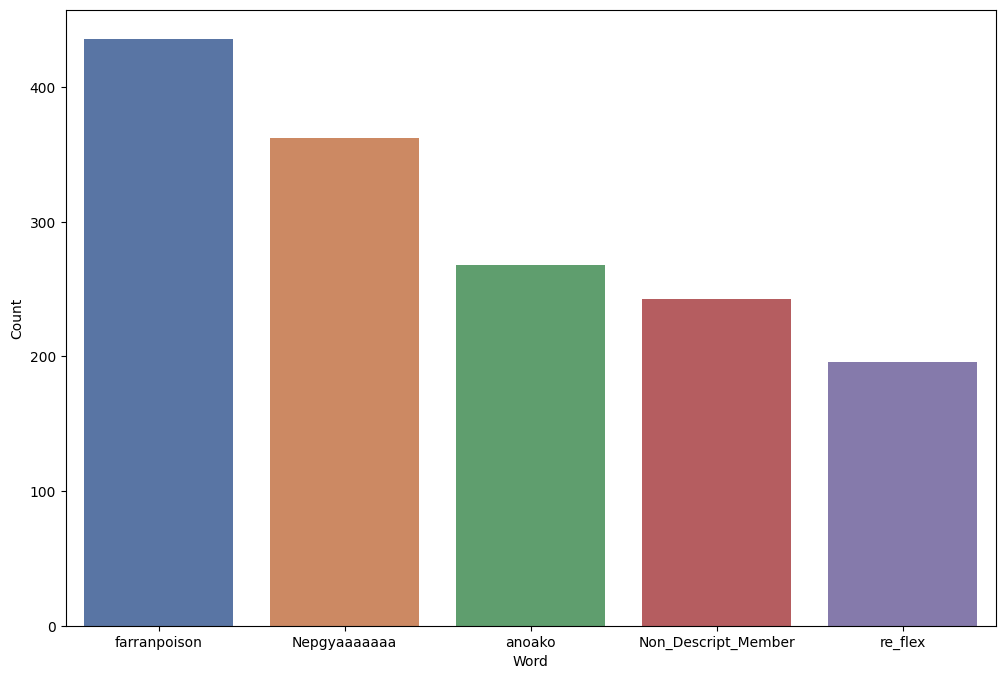

In [10]:
# Plot grafik yang menunjukkan 5 user/author yang paling sering
# berkomentar untuk komentar yang skornya lebih dari 250

counter(dv[dv["score"] >= 250], "author", 5)

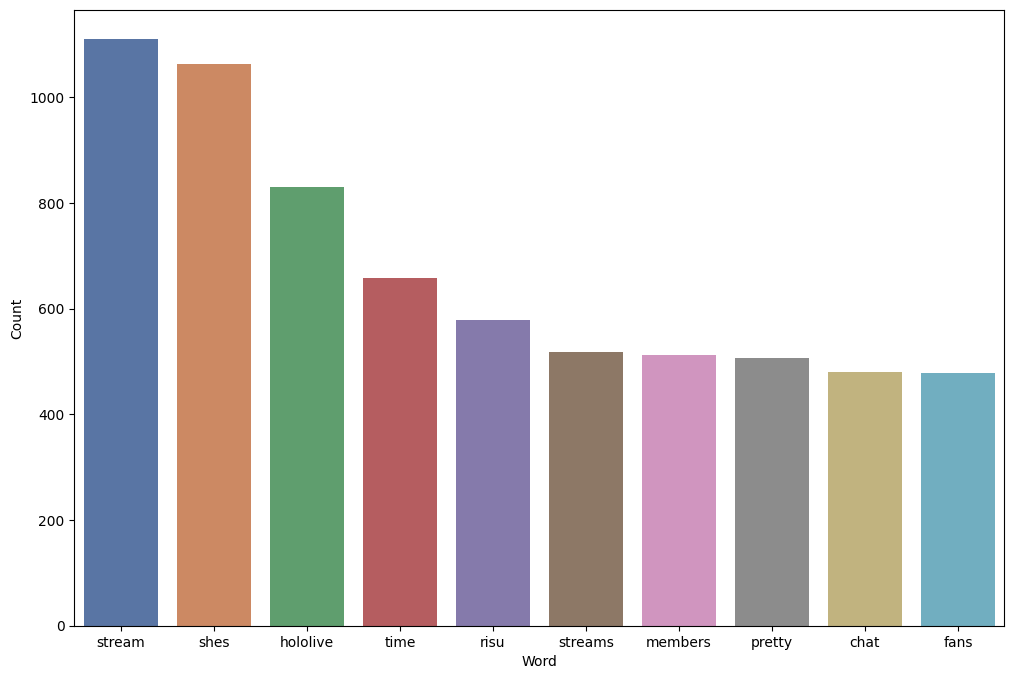

In [19]:
# Menunjukkan 10 kata yang paling sering digunakan oleh "farranpoison"
# atau user paling banyak komentar

counter(dv[dv["author"] == "farranpoison"], "body", 10)